In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path1 = 'tempdir/NA12891/setA/iter01/merged_stats.tsv'
path2 = 'tempdir/NA12891/setA/iter02/merged_stats.tsv'
outputdir='tempdir/NA12891/setA/combined2'


os.makedirs(outputdir, exist_ok=True)
df1 = pd.read_csv(path1, sep='\t')
df2 = pd.read_csv(path2, sep='\t')

merged = pd.concat([df1, df2], ignore_index=True)
merged['stage'] = ['initial', 'iteration01', 'iteration01', 'iteration02']
merged= merged.drop_duplicates()


In [2]:
merged

,CHROM,NA12891:PI,num_Vars_by_PI,range_of_PI,total_haplotypes,total_Vars,stage
0,20,"1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...","5,6,3,3,3,4,5,3,4,8,7,4,5,7,3,4,6,3,4,5,5,9,5,...","18860,39198,6180,11396,15999,1754,11424,1913,1...",1933,9666,initial
1,20,"1.0,5.0,9.0,12.0,13.0,17.0,18.0,20.0,21.0,22.0...","17,15,19,4,19,6,7,5,5,27,22,5,51,8,5,34,5,4,14...","83618,40234,56755,57384,147745,25885,26293,271...",391,9666,iteration01
3,20,"1.0,54.0,90.0,216.0,250.0,361.0,368.0,369.0,37...","254,195,612,164,541,34,4,4,5,879,240,590,636,3...","1172098,711912,3244413,656419,3413648,76875,70...",67,9666,iteration02


In [3]:
def plot_stacked_haplotypes_variants(merged_df, outputdir= None, show_plot=True):
    if outputdir is None:
        outputdir = os.getcwd()

    fig, axs = plt.subplots(ncols=2, figsize=(12,6), gridspec_kw={'width_ratios': [3, 1]})
    # axs.autoscale(enable=True) 
    g =sns.barplot(y = 'total_Vars', data=merged,x='CHROM',color='#FFBD33', ax= axs[1].twinx())
    # g.set(yticklabels=[])
    # ax[1].set_y_axis('')
    sns.barplot(y = 'total_haplotypes', data=merged, x='CHROM', hue= 'stage', ax= axs[0])
    axs[0].set(title="Bar plot showing total number \n of haplotypes for each chromosomes")
    axs[0].set(ylabel='total number of haplotypes')
    axs[1].set(title="Bar plot showing total number \n  of variants for each chromosomes")
    axs[1].set(ylabel='total number of variants')

    plt.tight_layout()
    if show_plot:
        plt.show()
    fig.savefig(outputdir+"/total_haps_stacked_with_vars2.png")

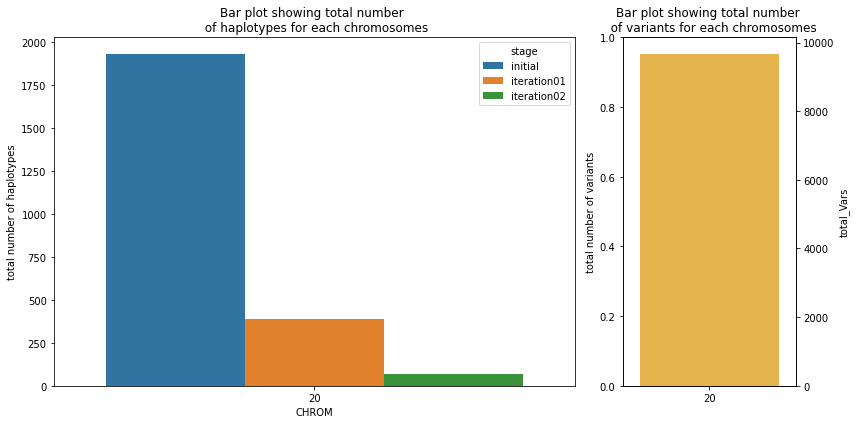

In [4]:
plot_stacked_haplotypes_variants(merged_df=merged)

In [5]:
def get_melted_df(df, col_name= 'range_of_PI'):
    splited = df[col_name].str.split(',', expand=True)
    splited['stage'] = ['initial', 'iteration01', 'iteration02']
    melted_df = splited.melt(id_vars= 'stage')
    melted_df.dropna(inplace=True)
    melted_df['value'] = pd.to_numeric(melted_df['value'])
    return melted_df



In [6]:
def plot_hist_one_chr_stacked(melted_df, hist_by=None, filepath=None, prefix= 'Stacked',logscale_x=True,
            logscale_y=True, show_plot=False):
    sub_title = (
            "number of variants" if hist_by == "num_Vars_by_PI" else "genomic distance"
        )
    title = f"{prefix} histogram of haplotype size by {sub_title} \n for each chromosome"
    ax = sns.displot(data=melted_df, x='value', hue='stage', log_scale=[logscale_x, logscale_y])
    # sns.move_legend(ax, "upper right", title='Stages')
    # ax.fig.suptitle(title)
    # if logscale_x:
    #     sub_title += " (in log2 scale)"
    # ax.set_xlabel(f"size of the haplotype (by {sub_title})")

    # if logscale_y:

    #     y_label = "frequency of the haplotypes(in log2scale) "
    # else:
    y_label = "frequency of the haplotypes"
    x_label = f"haplotype size by {sub_title}"
    
    # ax.set_ylabel(y_label)
    ax.set(title=title, xlabel =x_label, ylabel= y_label )
    plt.tight_layout()

    # ax.text(.05, .5, 'frequency of the haplotypes', ha='center', va='center', rotation='vertical')
    if show_plot:
        plt.show()
    if filepath:
        ax.figure.savefig(filepath)
        plt.close()

In [7]:
genomic_dist = get_melted_df(merged, col_name= 'range_of_PI')


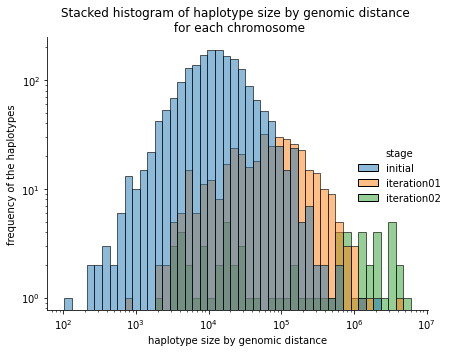

In [8]:
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=10, logscale_x=10)

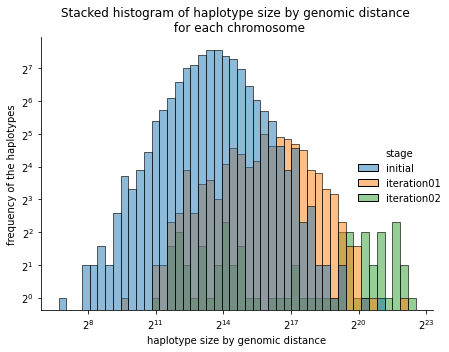

In [9]:
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI",show_plot=True, logscale_y=2, logscale_x=2)

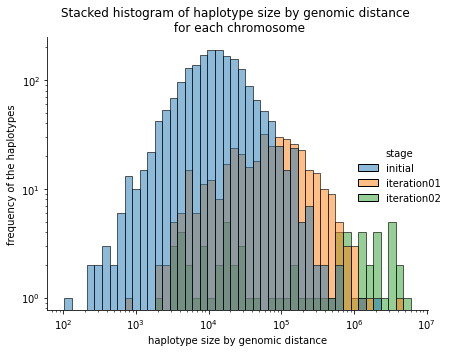

In [10]:
plot_hist_one_chr_stacked(genomic_dist, hist_by="range_of_PI", filepath=outputdir+"/hap_size_byGenomicRange_stacked.png", show_plot=True)

In [11]:
num_vars = get_melted_df(merged, col_name = "num_Vars_by_PI")

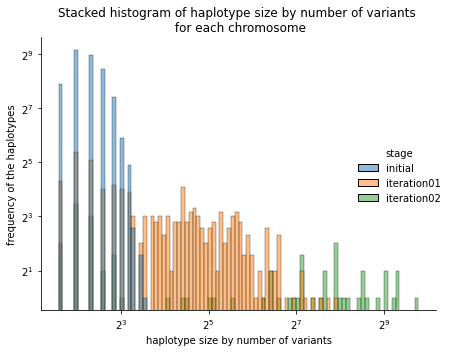

In [12]:
plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=2, logscale_x=2,filepath=outputdir+"/hap_size_byVars_stacked.png", show_plot=True)

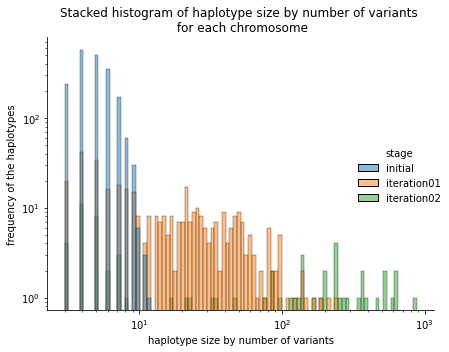

In [13]:
plot_hist_one_chr_stacked(num_vars,hist_by= "num_Vars_by_PI",logscale_y=10, logscale_x=10,filepath=outputdir+"/hap_size_byVars_stacked.png", show_plot=True)

In [20]:
def get_merged_metrices(merged_df, outputdir=None):
    new_df = pd.DataFrame()
    new_df['CHROM'] = merged_df['CHROM']
    new_df['max_range_pi'] = merged_df['range_of_PI'].apply(lambda x: max((int(xs) for xs in x.split(','))))
    new_df['min_range_pi'] = merged_df['range_of_PI'].apply(lambda x: min((int(xs) for xs in x.split(','))))
    new_df['max_num_vars_pi']= merged_df['num_Vars_by_PI'].apply(lambda x: max((int(xs) for xs in x.split(','))))
    new_df['min_num_vars_pi'] = merged_df['num_Vars_by_PI'].apply(lambda x: min((int(xs) for xs in x.split(','))))
    new_df['stage'] = merged_df['stage']
    if outputdir:
        new_df.to_csv(outputdir+"/metrics.csv", index=False)
        return


    return new_df


In [21]:
get_merged_metrices(merged)

,CHROM,max_range_pi,min_range_pi,max_num_vars_pi,min_num_vars_pi,stage
0,20,2057927,104,12,3,initial
1,20,4386983,753,237,3,iteration01
3,20,6022477,2245,879,3,iteration02
